In [1]:
import pandas as pd

# Load the dataset with appropriate encoding
data_frame = pd.read_csv("/content/spamSMS.csv", encoding="ISO-8859-1")

In [2]:
# Keep only relevant columns and rename them for clarity
data_frame = data_frame[['v1', 'v2']]
data_frame = data_frame.rename(columns={'v1': 'label', 'v2': 'message'})
data_frame['label'] = data_frame['label'].map({'ham': 1, 'spam': 0})

In [3]:
# Calculate the percentage of spam and ham messages
label_distribution = data_frame['label'].value_counts(normalize=True) * 100
ham_ratio, spam_ratio = label_distribution

print(f'Spam Messages Percentage: {spam_ratio:.2f}%')
print(f'Ham Messages Percentage: {ham_ratio:.2f}%')

Spam Messages Percentage: 13.41%
Ham Messages Percentage: 86.59%


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer and transform the message data
msg_vectorizer = CountVectorizer(max_features=500)
transformed_messages = msg_vectorizer.fit_transform(data_frame['message'])
features = msg_vectorizer.get_feature_names_out()
transformed_array = transformed_messages.toarray()

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    transformed_array, data_frame['label'], test_size=0.3, random_state=101)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale the feature vectors
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Training and evaluating SVM with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier_rbf.fit(X_train_scaled, y_train)
predictions_rbf = svm_classifier_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, predictions_rbf)
print(f'RBF Kernel SVM Accuracy: {accuracy_rbf:.2%}')

# Training and evaluating SVM with linear kernel
svm_classifier_linear = SVC(kernel='linear', C=1.0)
svm_classifier_linear.fit(X_train_scaled, y_train)
predictions_linear = svm_classifier_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, predictions_linear)
print(f'Linear Kernel SVM Accuracy: {accuracy_linear:.2%}')

RBF Kernel SVM Accuracy: 98.15%
Linear Kernel SVM Accuracy: 97.67%


In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Parameter tuning using Grid and Randomized Search
param_grid_rbf = {
    'C': [1, 10, 100, 10000000],
    'gamma': [0.001, 0.01, 0.1, 1],
}

grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, scoring='accuracy')
grid_search_rbf.fit(X_train_scaled, y_train)
print("Best Parameters via Grid Search:", grid_search_rbf.best_params_)
print(f"Best Grid Search Accuracy: {grid_search_rbf.best_score_:.2%}")

param_distribution = {
    'C': uniform(0.1, 10),
    'gamma': uniform(0.0001, 0.1),
}

random_search_rbf = RandomizedSearchCV(SVC(kernel='rbf'), param_distribution, n_iter=10, scoring='accuracy', random_state=101)
random_search_rbf.fit(X_train_scaled, y_train)
print("\nBest Parameters via Randomized Search:", random_search_rbf.best_params_)
print(f"Best Randomized Search Accuracy: {random_search_rbf.best_score_:.2%}")

Best Parameters via Grid Search: {'C': 10, 'gamma': 0.001}
Best Grid Search Accuracy: 98.15%

Best Parameters via Randomized Search: {'C': 7.315438617683046, 'gamma': 0.01909389542047968}
Best Randomized Search Accuracy: 90.67%


In [8]:
# Evaluation of the best models
best_grid_model = grid_search_rbf.best_estimator_
predictions_grid = best_grid_model.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, predictions_grid)
print(f"\nGrid Search Test Accuracy: {accuracy_grid:.2%}")

best_random_model = random_search_rbf.best_estimator_
predictions_random = best_random_model.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, predictions_random)
print(f"Randomized Search Test Accuracy: {accuracy_random:.2%}")


Grid Search Test Accuracy: 98.50%
Randomized Search Test Accuracy: 92.88%



Best Model Test Accuracy: 98.50%

Best Model Confusion Matrix:
[[ 184   24]
 [   1 1463]]


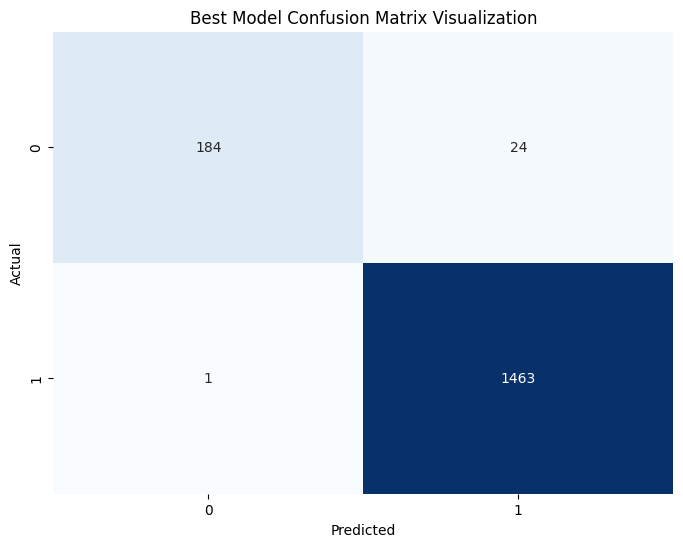

In [9]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

best_model_predictions = best_grid_model.predict(X_test_scaled)
best_model_accuracy = accuracy_score(y_test, best_model_predictions)
print(f"\nBest Model Test Accuracy: {best_model_accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, best_model_predictions)
print("\nBest Model Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best Model Confusion Matrix Visualization')
plt.show()


Best Randomized Search Model Test Accuracy: 92.88%

Confusion Matrix for the Best Randomized Search Model:
[[  89  119]
 [   0 1464]]


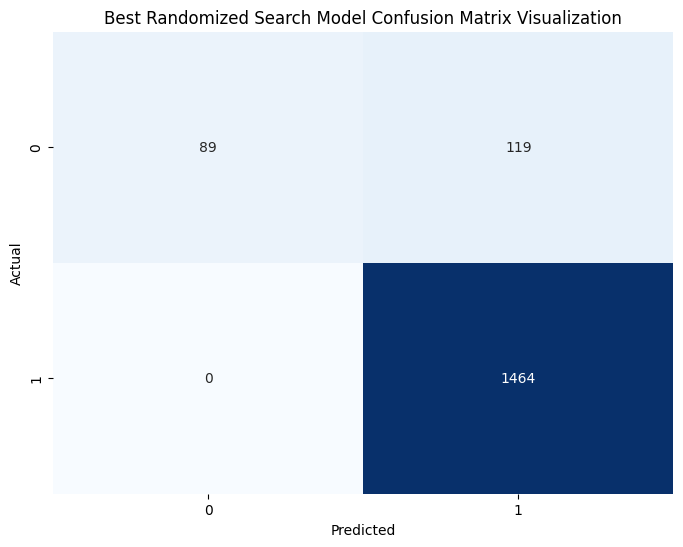

In [10]:
# Confusion matrix for the model optimized with Randomized Search
best_random_model_predictions = best_random_model.predict(X_test_scaled)
best_random_model_accuracy = accuracy_score(y_test, best_random_model_predictions)
print(f"\nBest Randomized Search Model Test Accuracy: {best_random_model_accuracy:.2%}")

conf_matrix_random = confusion_matrix(y_test, best_random_model_predictions)
print("\nConfusion Matrix for the Best Randomized Search Model:")
print(conf_matrix_random)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best Randomized Search Model Confusion Matrix Visualization')
plt.show()
